In [1]:
#Import necessary libraries
from __future__ import print_function #Python 2.7 compatibility
#from srwlib import *
from LCTlib import *
%load_ext autoreload
%autoreload 2
import numpy as np
import math
import os 
import sys
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage
hfontLarge = {'fontname':'Latin Modern Roman', 'size' : 24, 'weight' : 'bold'}

In [60]:
#Create initial Gaussian
sigmar = 0.15e-3 #Initial RMS beam size at center of cavity [m]
propLen=15 #Propagation of initial Gaussian [m]. It will then be back-propagated by propLen: a trick to get the Gaussian mode at the waist
pulseE = .001 #Total energy of pulse [eV]
mx = 1 #Horizontal mode number (0 for Gaussian)
my = 1 #Vertical mode number (0 for Gaussian)
poltype = 1 #Polarization of mode (0=linear horizontal, 1=linear vertical, 2=linear 45 deg, 3=linear 135 deg, 4=circular right, 5=circular left, 6=total)
wavefrontEnergy = 1.55 #Wavefront Energy [eV]. 1.55 eV is 800 nm wavelength
sampFact = 10 #Determines grid size of initial wavefront
wfr0=createGsnSrcSRW(sigmar,propLen,pulseE,poltype,wavefrontEnergy,sampFact,mx,my) #creates Gaussian wavefront in SRW
(nx0,ny0)=(wfr0.mesh.nx,wfr0.mesh.ny)
print("Initial wavefront calculated on a grid of %d x %d points" %(nx0,ny0))

Initial wavefront calculated on a grid of 1944 x 1944 points


In [41]:
#Resize initial Elec Field?
srwl.ResizeElecField(wfr0, 'c', [0,1.5,1,1.5,1])
(nx0,ny0)=(wfr0.mesh.nx,wfr0.mesh.ny)
print("New grid size of %d x %d points" %(nx0,ny0))

New grid size of 2916 x 2916 points


In [51]:
?srwl.ResizeElecField

Docstring: ResizeElecField() "Resizes" Electric Field Wavefront vs transverse positions / angles or photon energy / time
Type:      builtin_function_or_method


In [61]:
# Create a rotation ABCD matrix
theta = np.pi/4
Aval = np.cos(theta)
Bval = np.sin(theta)
Cval = -np.sin(theta)
Dval = np.cos(theta)

#Create an initial Gaussian wavefront

wfr1 = deepcopy(wfr0)

#wfrsizef=(wfr1.mesh.nx*wfr1.mesh.ny)

ABCDBL=createABCDbeamline(Aval,Bval,Cval,Dval) 

start_time = time.time()
srwl.PropagElecField(wfr1, ABCDBL) #theta = pi/4  
wfr2 = deepcopy(wfr1)
srwl.PropagElecField(wfr2, ABCDBL) #theta = pi/2 
srwl.PropagElecField(wfr2, ABCDBL) #theta = 3pi/4 
srwl.PropagElecField(wfr2, ABCDBL) #theta = pi 
srwl.PropagElecField(wfr2, ABCDBL) #theta = 5pi/4 
srwl.PropagElecField(wfr2, ABCDBL) #theta = 3pi/2 
srwl.PropagElecField(wfr2, ABCDBL) #theta = 7pi/4 
srwl.PropagElecField(wfr2, ABCDBL) #theta = 2pi 
print("Propagation time: %s seconds" %(round((time.time() - start_time),5)))

Propagation time: 8.03582 seconds


Size of initial wavefront data array (coordinate): (1944, 1944)


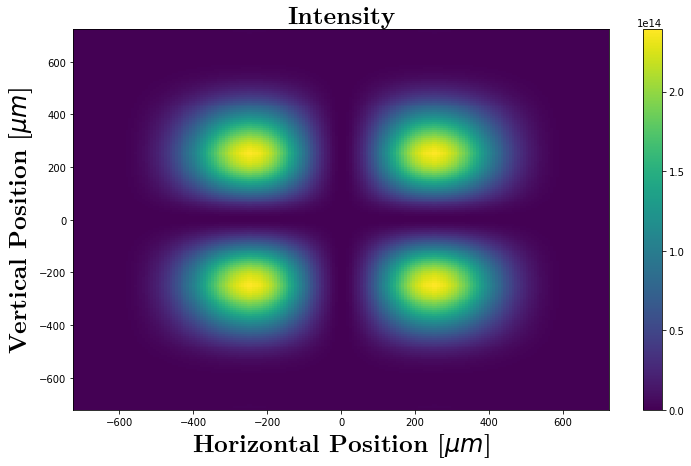

In [68]:
# Plot initial wavefront
wfrplot = wfr0

arIinit = array('f', [0]*wfrplot.mesh.nx*wfrplot.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfrplot, 6, 0, 3, wfrplot.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIinit2D = np.array(arIinit).reshape((wfrplot.mesh.nx, wfrplot.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot.mesh.xStart,wfrplot.mesh.xFin,wfrplot.mesh.nx)
yvals0=np.linspace(wfrplot.mesh.yStart,wfrplot.mesh.yFin,wfrplot.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIinit2D, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
zoomfactor=10
xmax = wfrplot.mesh.xFin*1e6
ymax = wfrplot.mesh.yFin*1e6
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity',**hfontLarge)
plt.show()

Size of initial wavefront data array (coordinate): (1944, 1944)


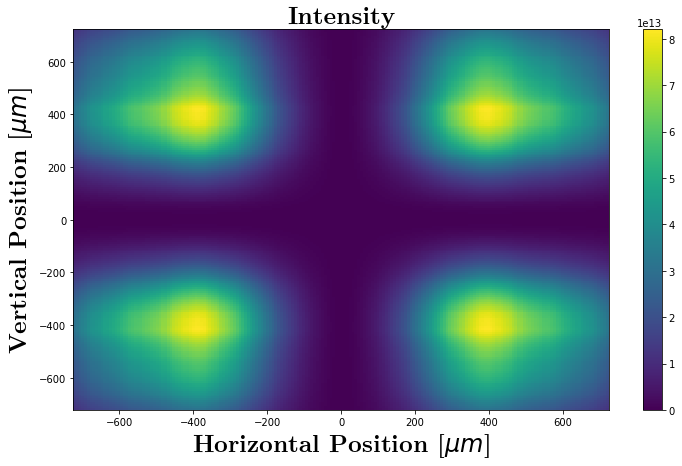

In [69]:
# Plot wavefront at pi/4
wfrplot2 = wfr1

arIinit = array('f', [0]*wfrplot2.mesh.nx*wfrplot2.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfrplot2, 6, 0, 3, wfrplot2.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIinit2D1 = np.array(arIinit).reshape((wfrplot2.mesh.nx, wfrplot2.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIinit2D1, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity',**hfontLarge)
plt.show()

Size of initial wavefront data array (coordinate): (1944, 1944)


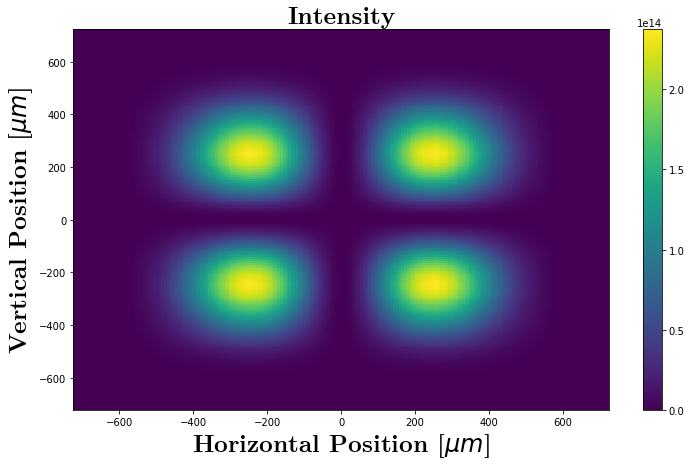

In [70]:
# Plot final wavefront
wfrplot2 = wfr2

arIfinal = array('f', [0]*wfrplot2.mesh.nx*wfrplot2.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIfinal, wfrplot2, 6, 0, 3, wfrplot2.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIfinal2D = np.array(arIfinal).reshape((wfrplot2.mesh.nx, wfrplot2.mesh.ny), order='C')
wfrsizei=np.size(arIfinal)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIfinal2D, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity',**hfontLarge)
plt.show()

In [71]:
arIDif = arIfinal2D - arIinit2D
difMax = np.max(arIDif)
print('%.10f' % difMax)

3283905150976.0000000000


Size of initial wavefront data array (coordinate): (1944, 1944)


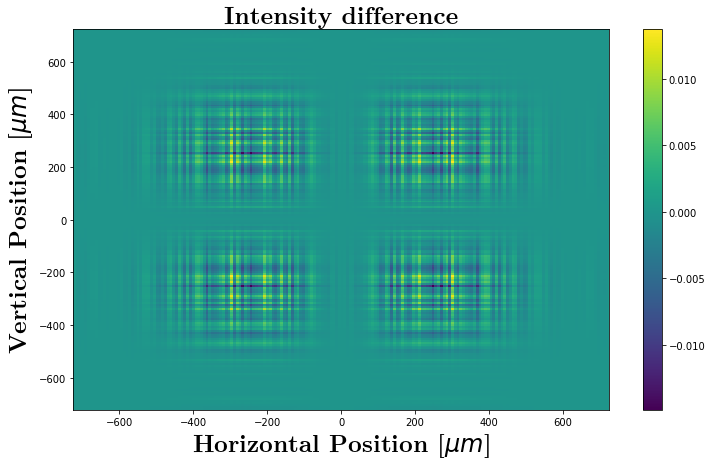

In [72]:
# Plot difference in intensity
wfrplot2 = wfr2

norm = np.max(np.abs(arIinit2D))

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvals0=np.linspace(wfrplot2.mesh.xStart,wfrplot2.mesh.xFin,wfrplot2.mesh.nx)
yvals0=np.linspace(wfrplot2.mesh.yStart,wfrplot2.mesh.yFin,wfrplot2.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvals0,1e6), np.multiply(yvals0,1e6), arIDif/norm, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
ax.set_ylim(-ymax/zoomfactor,ymax/zoomfactor)
ax.set_xlim(-xmax/zoomfactor,xmax/zoomfactor)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity difference',**hfontLarge)
plt.show()